# Laboratory #02 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

**Remember this is a graded exercise.**

For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color, feature
from skimage.util import img_as_float

# Convolution
Hint: 
*   *convolve function is available in skimage.filter.edges module*
*   The mask has to be normalized before convolving with the image

**Exercise:**
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


The image data is read and the mask is declared as an array of ones of shape (1, 15) that each of the elements weight 1/15. Afterwards the convolution is done.

In [2]:
camera = data.camera()
mask = np.ones((1, 15)) / 15
horizontal_convolution = filters.edges.convolve(camera, mask)

*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

In [3]:
camera = data.camera()
mask = np.ones((15, 1)) / 15
vertical_convolution = filters.edges.convolve(camera, mask)

*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

as we want the sum of the values of the filter to be one, the mask is divided by 15**2

In [4]:
camera = data.camera()
mask = np.ones((15, 15)) / (15 ** 2)
_2d_convolution = filters.edges.convolve(camera, mask)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

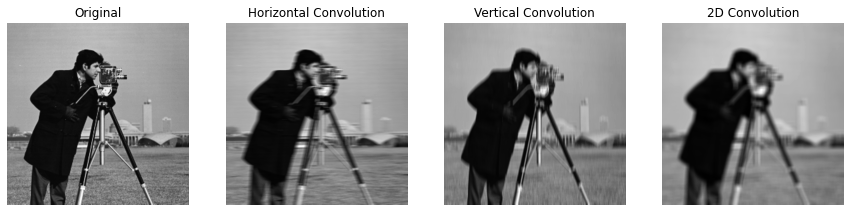

In [5]:
data_images = {'Original': camera, 
        'Horizontal Convolution': horizontal_convolution, 
        'Vertical Convolution': vertical_convolution, 
        '2D Convolution': _2d_convolution}

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
for i, (title, image) in enumerate(data_images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


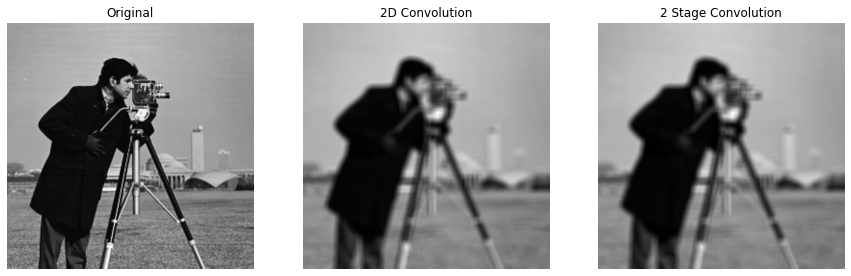

In [6]:
camera = data.camera()
mask = np.ones((1, 15)) / 15
horizontal_convolution = filters.edges.convolve(camera, mask)
mask = np.ones((15, 1)) / 15
_2_stage_convolution = filters.edges.convolve(horizontal_convolution, mask)

data_images = {'Original': camera, 
        '2D Convolution': _2d_convolution,
        '2 Stage Convolution': _2_stage_convolution}

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
for i, (title, image) in enumerate(data_images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

No, as the convolution is a linear function so applying the operations in a two-staged process shouldn't change the output.

The general expression of a convolution is

\begin{equation}
    g(x,y)=\omega *f(x,y) = \sum_{dx=-a}^{a}\sum_{dy=-b}^{b} \omega (dx,dy)f(x+dx,y+dy)
\end{equation}

where $g(x,y)$ is the filtered image, $f(x,y)$ is the original image, $\omega$ is the filter kernel. Every element of the filter kernel is considered by $-a\leq dx\leq a$ and $-b\leq dy\leq b$.

then if we define $\omega := \beta \times \beta^{T} $ and $\beta$ is the $(15 x 1)$ filter.

\begin{equation}
    g(x,y)=\omega *f(x,y) = (\beta \times \beta^{T})*f(x,y) = \sum_{dx=-a}^{a}\sum_{dy=-b}^{b} (\beta \times \beta^{T}) (dx,dy)f(x+dx,y+dy)
\end{equation}

because $\omega$ is separable by definition, it can be separed as $\omega[x,y] = (\beta[y] \times \beta^{T}[x])$

\begin{equation}
    g(x,y)=\sum_{dy=-b}^{b}\sum_{dx=-a}^{a} (\beta(dy) \times \beta^{T}(dx)) f(x+dx,y+dy)
\end{equation}

and because now $\beta[y]$ is not dependant on $x$ it can be taken out of the summatory

\begin{equation}
    g(x,y)=\sum_{dy=-b}^{b}\beta(dy)\sum_{dx=-a}^{a} \beta^{T}(dx) f(x+dx,y+dy) = \sum_{dx=-a}^{a}\beta(dy)(\beta^{T}*f(x,y)) = \beta*\beta^{T}*f(x,y)
\end{equation}

So it is demonstrated that the operation is linear and does not vary:
\begin{equation}
    g(x,y)=\omega *f(x,y) =\beta*\beta^{T}*f(x,y)
\end{equation}

# Image Blurring

*   Why is blurring important?



**Solution**

The use cases for blurring are mainly noise removal and egde detection as well as image sharpening

**Exercise: Gaussian Filter**
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

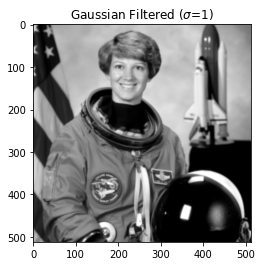

In [7]:
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)
filtered_image = filters.gaussian(astronaut_gray, sigma=1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filtered ($\sigma$=1)')
plt.show()

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

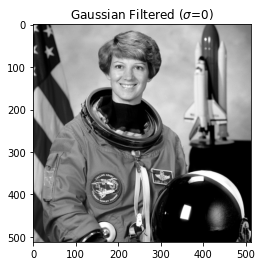

In [8]:
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)
filtered_image = filters.gaussian(astronaut_gray, sigma=0)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filtered ($\sigma$=0)')
plt.show()

**Solution**

A gaussian filter with $\sigma=0$ will be an impulse filter, a filter with a kernel with zeros and a one in its center. Because of that, the image remains unaltered.

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

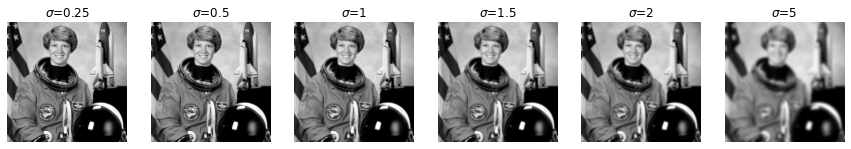

In [9]:
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)

data_images = {'$\sigma$=0.25': 0.25, 
               '$\sigma$=0.5': 0.5,
               '$\sigma$=1': 1,
               '$\sigma$=1.5': 1.5,
               '$\sigma$=2': 2,
               '$\sigma$=5': 5}

fig, axs = plt.subplots(1, len(data_images), figsize=(15, 15))
for i, (title, sigma) in enumerate(data_images.items()):
    filtered_image = filters.gaussian(astronaut_gray, sigma=sigma)
    axs[i].imshow(filtered_image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    How do you think an optimal sigma value can be found?




**Solution**

As the $\sigma$ gets smaller, the filter resembles more the identity. As the $\sigma$ gets bigger the kernel resembles more and more a uniform kernel. Because of that, the smaller the $\sigma$, the more unaltered is the image. As the $\sigma$ gets bigger, the images becomes blurrier.

**Exercise: Median Filter**
*   Convert the 'astronauts' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image, filtered image using different structuring element using matplotlib subplot.

In [10]:
# solution
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)

In [11]:
# selem objects definition of radius 1, 5 and 10
selemObjects = {
    "radius=1": morphology.selem.disk(1),
    "radius=5": morphology.selem.disk(5),
    "radius=10": morphology.selem.disk(10)
}

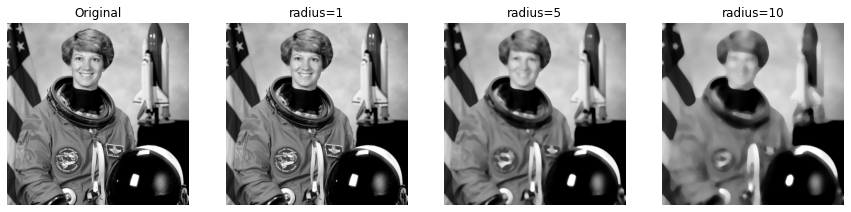

In [12]:
# plotting and formatting
f, axs = plt.subplots(1, 4, figsize=(15, 9))
axs[0].imshow(astronaut_gray, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')
for i, (title, selemObject) in enumerate(selemObjects.items()):
    # median filter application
    filteredImage = filters.median(astronaut_gray, selem=selemObject)
    axs[i+1].imshow(filteredImage, cmap='gray')
    axs[i+1].set_title(title)
    axs[i+1].axis('off')
plt.show()

In [13]:
# different selem objects
selemObjects = {
    "square (radius=15)": morphology.selem.square(15),
    "star (radius=5)": morphology.selem.star(5),
    "diamond (radius=7)": morphology.selem.diamond(7)
}

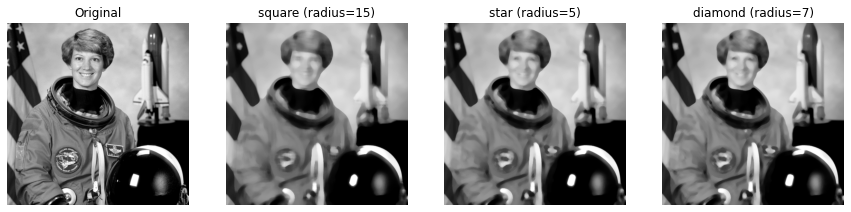

In [14]:
# plot
f, axs = plt.subplots(1, 4, figsize=(15, 9))
axs[0].imshow(astronaut_gray, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')
for i, (title, selemObject) in enumerate(selemObjects.items()):
    filteredImage = filters.median(astronaut_gray, selem=selemObject)
    axs[i+1].imshow(filteredImage, cmap='gray')
    axs[i+1].set_title(title)
    axs[i+1].axis('off')
plt.show()

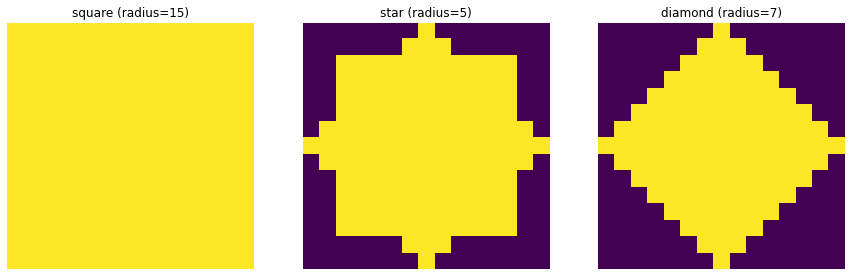

In [15]:
f, axs = plt.subplots(1, 3, figsize=(15, 9))
for i, (title, selemObject) in enumerate(selemObjects.items()):
    fftImg = np.abs(np.fft.fft2(selemObject))
    # axs[i].imshow(fftImg[:len(fftImg)//2, :len(fftImg)//2], cmap='gray')
    axs[i].imshow(selemObject, vmax=1, vmin=0)
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()


*   What is the effect of the structuring element on the median filter?


**Solution**

When of the same size, the square surface of which values is 1 is greater. This will affect the reach of the median algorithm, who will be able to get values from further away in the image and will result in a blurrier image. 

*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

Each of the filters do a different operation to the signal. The gaussian filter has a kernel with a matrix where its weights follow a gaussian distribution. The mean filter is a uniform kernel with its sum equal to 1. The median filter is a non linear operation where the values of the portion of the image are sorted and then the middle value is extracted as the result.

Use Cases:
- Gaussian: Gaussian Noise removal.
- Median: Impulse Noise Filtering.
- Mean: Noise filtering while preserving the contrast.

**Exercise: Effect of noise**

It is easy to add noise to an image using the random_noise function available in skimage.util

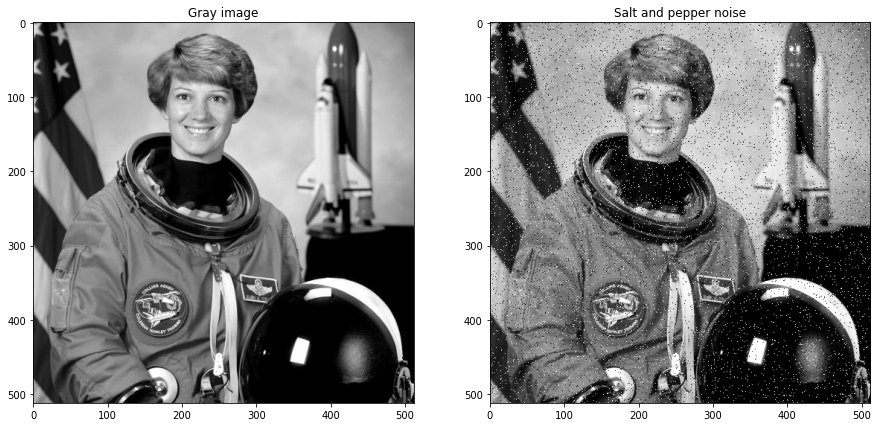

In [16]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

In [17]:
# solution
from skimage.util import random_noise
image = data.chelsea()
image = color.rgb2gray(image)

img_sp = random_noise(image, mode='s&p')
img_gauss = random_noise(image, mode='gaussian')

In [18]:
selemObject = morphology.selem.square(5)
filtersDict = {
    "Original": img_sp,
    "median": filters.median(img_sp, selem=selemObject),
    "gauss": filters.gaussian(img_sp),
    "mean": filters.rank.mean(img_sp, selem=selemObject)
}

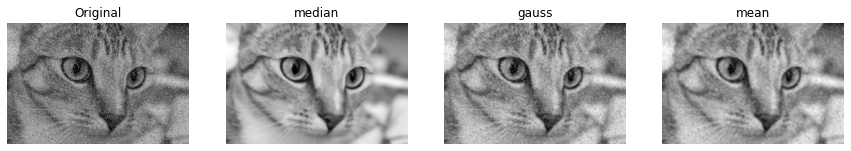

In [19]:
f, ax = plt.subplots(1, 4, figsize=(15, 9))
for idx, (title, filteredImage) in enumerate(filtersDict.items()):
    ax[idx].set_title(title)
    ax[idx].imshow(filteredImage, cmap='gray')
    ax[idx].axis('off')
plt.show()

In [20]:
filtersDict = {
    "Original": img_gauss,
    "median": filters.median(img_gauss, selem=selemObject),
    "gauss": filters.gaussian(img_gauss, sigma=2),
    "mean": filters.rank.mean(img_gauss, selem=selemObject)
}

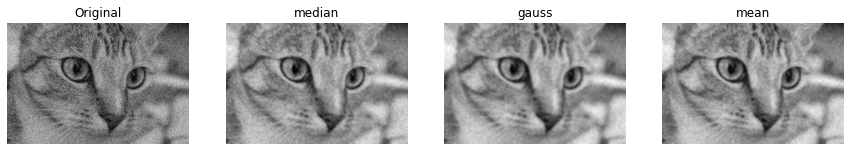

In [21]:
f, ax = plt.subplots(1, 4, figsize=(15, 9))
for idx, (title, filteredImage) in enumerate(filtersDict.items()):
    ax[idx].set_title(title)
    ax[idx].imshow(filteredImage, cmap='gray')
    ax[idx].axis('off')
plt.show()

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

For gaussian noise, the gaussian filter works the best. On the other hand, in the salt and pepper noise, the median filter works the best.

- Gaussian: since the Fourier transform of a Gaussian is another Gaussian, applying a Gaussian filtering on the image has the effect of reducing the image's high-frequency components.
- S&P: since the salt and pepper noise is essentialy impulse pixels of 0 or 255 intensity, it is not usual to be very usual in a small portion of the image. Because of that, and because the median filter is very robust to sudden changes in intensity and outlier values, it is chosen as the best one in the S&P filtering.

# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

**Exercise:**
*   Read 'moon' image from the data module
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize each of the results using matplotlib

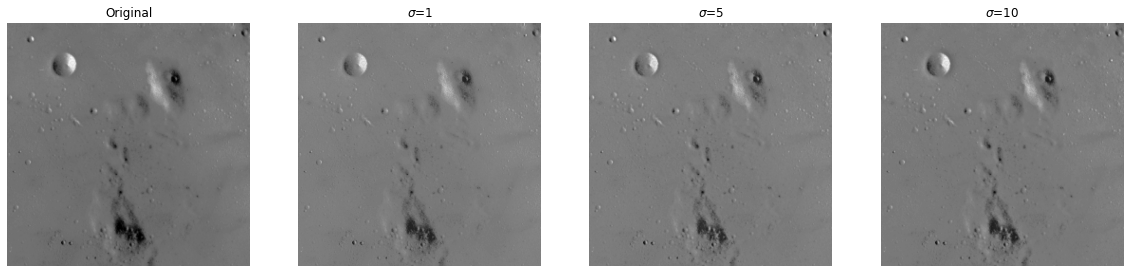

In [22]:
# solution
def enhanceImage(original, amount=1, sigma=1):
    original = img_as_float(original, force_copy=True)
    blurred = filters.gaussian(original, sigma=sigma)
    enhanced = original + amount * (original - blurred)
    return enhanced

moonImage = data.moon()
sigmaValues = [1, 5, 10]

f, ax = plt.subplots(1, len(sigmaValues)+1, figsize=(20, 20))
ax[0].set_title("Original")
ax[0].imshow(moonImage, cmap='gray')
ax[0].axis('off')
for idx, sigmaValue in enumerate(sigmaValues):
    ax[idx+1].set_title(f"$\sigma$={sigmaValue}")
    ax[idx+1].imshow(enhanceImage(moonImage, sigma=sigmaValue), cmap='gray')
    ax[idx+1].axis('off')
plt.show()

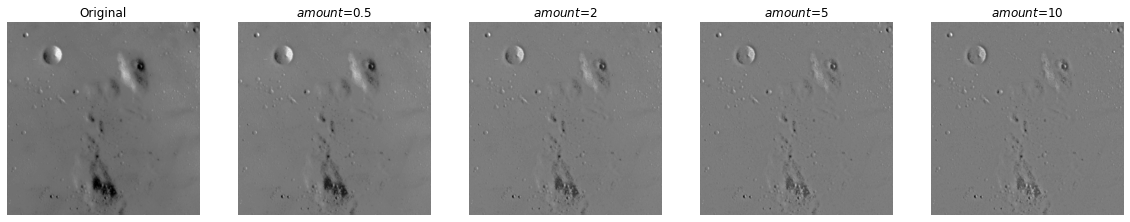

In [23]:
ammountValues = [.5, 2, 5, 10]
sigmaValue = 5

f, ax = plt.subplots(1, len(ammountValues)+1, figsize=(20, 20))
ax[0].set_title("Original")
ax[0].imshow(moonImage, cmap='gray')
ax[0].axis('off')
for idx, ammountValue in enumerate(ammountValues):
    ax[idx+1].set_title(f"$amount$={ammountValue}")
    ax[idx+1].imshow(enhanceImage(moonImage, amount=ammountValue, sigma=sigmaValue), cmap='gray')
    ax[idx+1].axis('off')
plt.show()

# Edge Detection

**Exercise:**
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

In [24]:
# solution
cameraImage = img_as_float(data.camera())

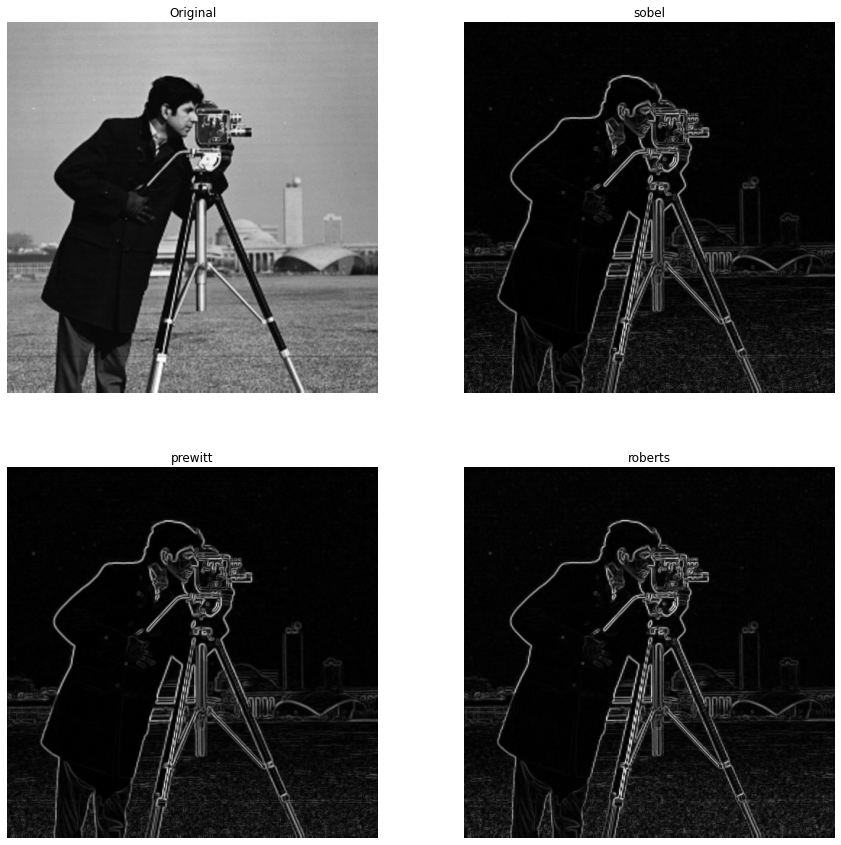

In [25]:
processedImages = {
    "sobel": filters.sobel(cameraImage),
    "prewitt": filters.prewitt(cameraImage),
    "roberts": filters.roberts(cameraImage)
}

f, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].set_title("Original")
ax[0][0].imshow(cameraImage, cmap='gray')
ax[0][0].axis('off')
for idx, (label, image) in enumerate(processedImages.items()):
    idx = idx + 1
    ax[idx//2][idx%2].set_title(label)
    ax[idx//2][idx%2].imshow(image, cmap='gray')
    ax[idx//2][idx%2].axis('off')
f.show()

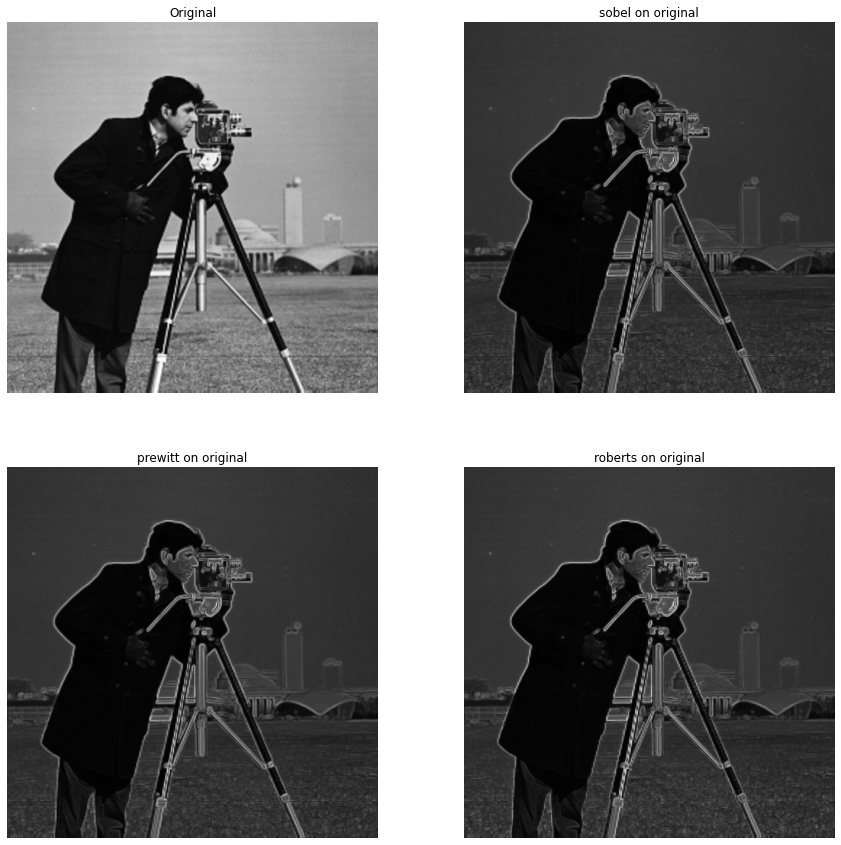

In [26]:
f, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].set_title("Original")
ax[0][0].imshow(cameraImage, cmap='gray')
ax[0][0].axis('off')
for idx, (label, image) in enumerate(processedImages.items()):
    idx = idx + 1
    ax[idx//2][idx%2].set_title(label + " on original")
    ax[idx//2][idx%2].imshow(cameraImage, cmap='gray')
    ax[idx//2][idx%2].imshow(image, cmap='gray', alpha=.7)
    ax[idx//2][idx%2].axis('off')
f.show()


*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

All of them are very similar, however, it can be noticed that prewitt is more robust to the grass noise-like signal. 

**Exercise: Canny edge detector**
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image, edges and the edges superimposed on the original image.

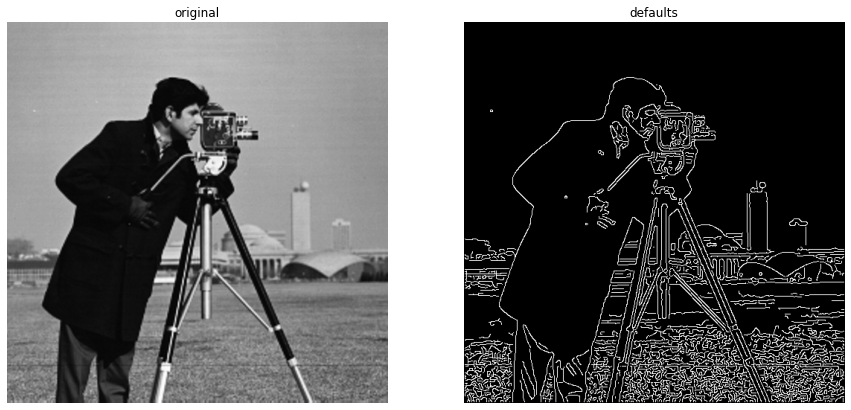

In [27]:
# solution
cameraImage = img_as_float(data.camera())

sigmaValues = [1, 3, 5, 10]

f, ax = plt.subplots(1, 2, figsize=(15, 9))
ax[0].set_title("original")
ax[0].imshow(cameraImage, cmap='gray')
ax[0].axis('off')
ax[1].set_title("defaults")
ax[1].imshow(feature.canny(cameraImage), cmap='gray')
ax[1].axis('off')
plt.show()


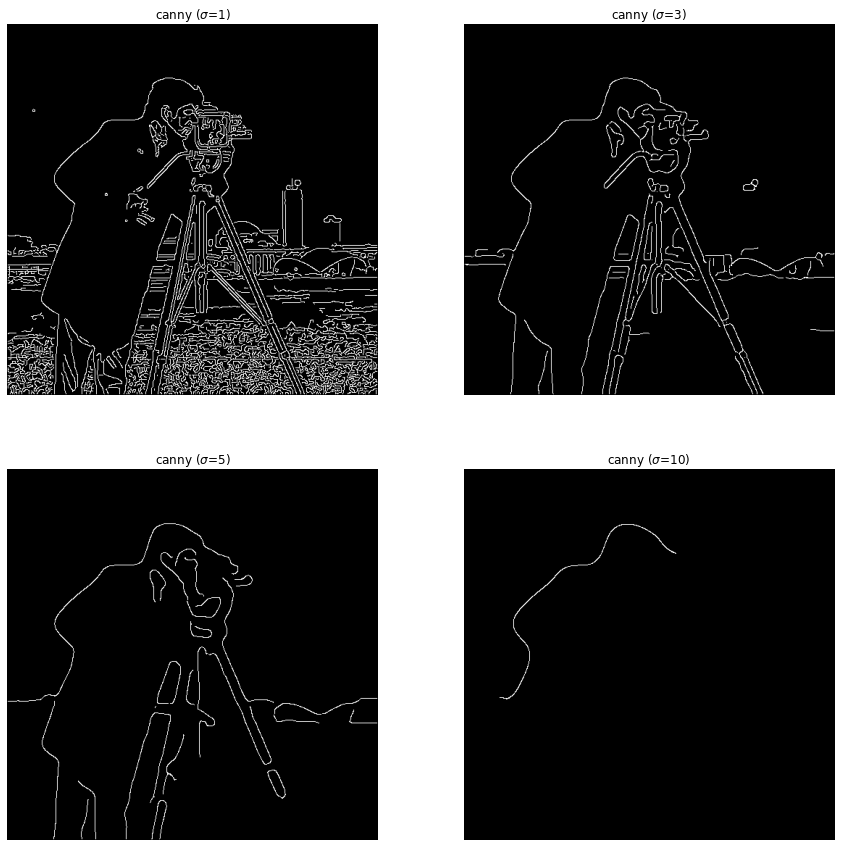

In [28]:
f, ax = plt.subplots(2, 2, figsize=(15, 15))
for idx, sigmaValue in enumerate(sigmaValues):
    ax[idx//2][idx%2].set_title(f"canny ($\sigma$={sigmaValue})")
    ax[idx//2][idx%2].imshow(feature.canny(cameraImage, sigma=sigmaValue), cmap='gray')
    ax[idx//2][idx%2].axis('off')
f.show()

*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?


**Solution**

It makes the threshold bigger and because of that few and few lines are passing that value. As a result, the canny detector detects fewer lines the bigger the $\sigma$ value.

*   What is the algorithm behind the Canny operator?


**Solution**

The Process of Canny edge detection algorithm if performed in 5 steps:

- Apply Gaussian filter to smooth the image (remove noise)
- Find the intensity gradients of the image
- Get rid of spurious response to edge detection by applying non-maximum suppression
- Apply double threshold to determine potential edges
- Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.


---

## **End of P2: Filters and Edges**
Deadline for P2 submission in CampusVirtual is: **Thursday, the 15th of October, 2020**
